In [7]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


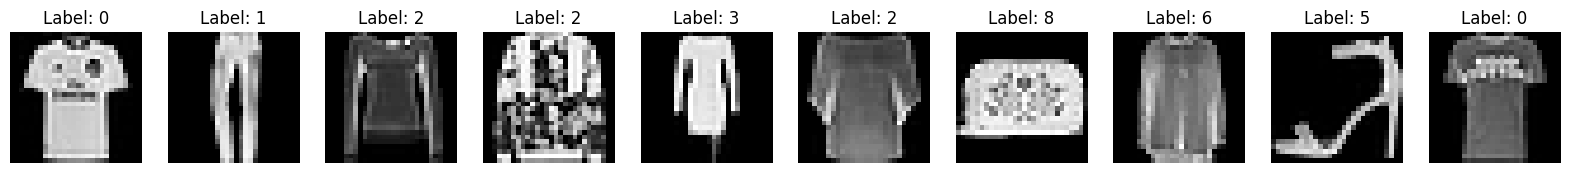

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Load and preprocess data
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Take first 8000 training samples and 2000 test samples
X_train = train_data.iloc[:8000, 1:].values  # Excluding the label column
y_train = train_data.iloc[:8000, 0].values
X_test = test_data.iloc[:2000, 1:].values
y_test = test_data.iloc[:2000, 0].values

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Visualize 10 test samples
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {y_test[i]}')
plt.show()


/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


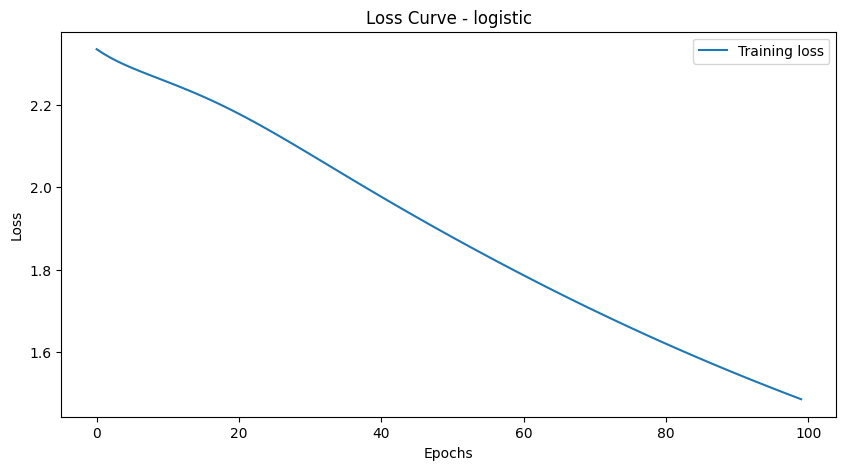

/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


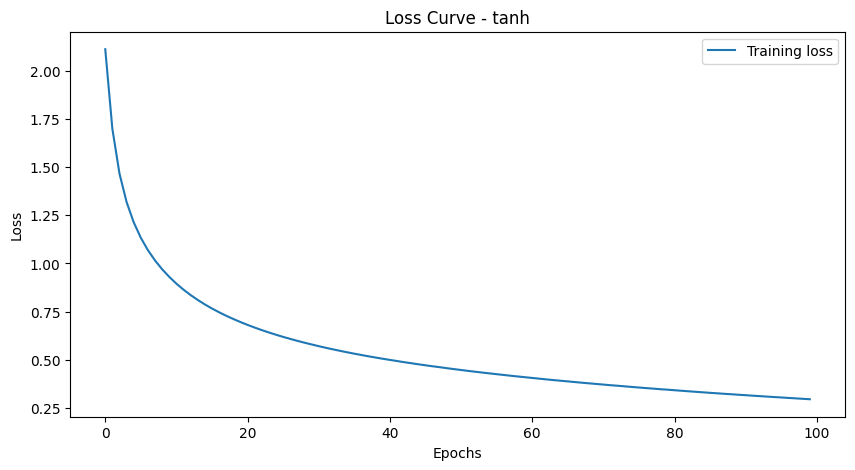

/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


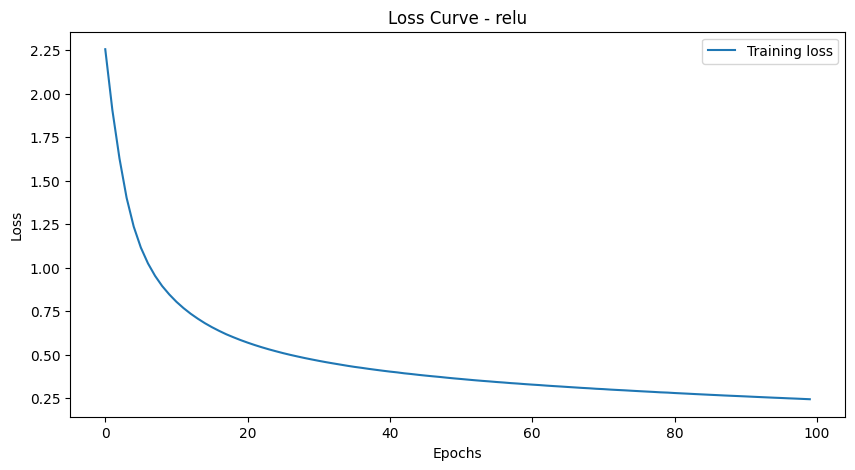

/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


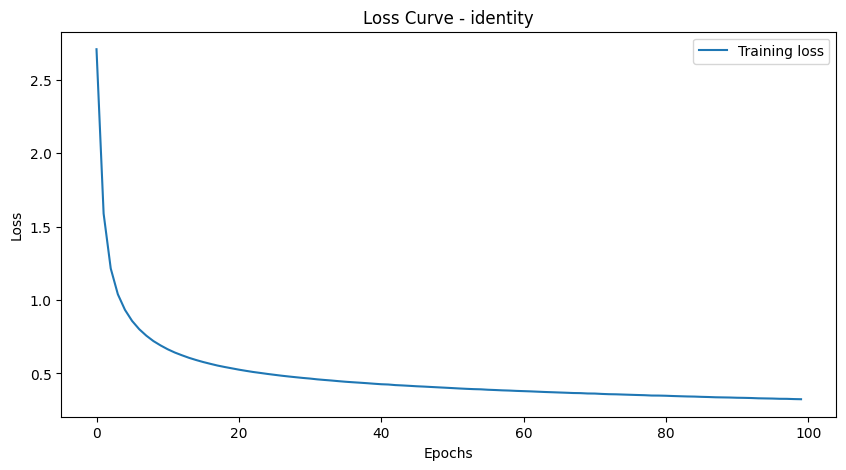

In [9]:

# 2. Train MLP Classifier with different activation functions
activations = ['logistic', 'tanh', 'relu', 'identity']
mlp_results = {}

for activation in activations:
    mlp = MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation=activation,
        solver='adam',
        batch_size=128,
        learning_rate_init=2e-5,
        max_iter=100,
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    
    # Plot loss curves
    plt.figure(figsize=(10, 5))
    plt.plot(mlp.loss_curve_, label='Training loss')
    plt.title(f'Loss Curve - {activation}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    mlp_results[activation] = mlp.score(X_test_scaled, y_test)


In [10]:

# 3. Grid Search for best hyperparameters
best_activation = max(mlp_results.items(), key=lambda x: x[1])[0]
param_grid = {
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [1e-5, 2e-5, 1e-4],
    'batch_size': [64, 128, 256]
}

grid_search = GridSearchCV(
    MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation=best_activation,
        max_iter=100,
        random_state=42
    ),
    param_grid,
    cv=3
)
grid_search.fit(X_train_scaled, y_train)



/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='tanh',
                                     hidden_layer_sizes=(128, 64, 32),
                                     max_iter=100, random_state=42),
             param_grid={'batch_size': [64, 128, 256],
                         'learning_rate_init': [1e-05, 2e-05, 0.0001],
                         'solver': ['adam', 'sgd']})

In [14]:
# #best params : MLPClassifier(activation='tanh', batch_size=64,
#               hidden_layer_sizes=(128, 64, 32), learning_rate_init=2e-05,
#               max_iter=100, random_state=42)

mlp = MLPClassifier(activation='tanh', batch_size=64,
                    hidden_layer_sizes=(128, 64, 32), learning_rate_init=2e-05,
                    max_iter=100, random_state=42)

mlp.fit(X_train_scaled, y_train)
accuracy = mlp.score(X_test_scaled, y_test)
print(f"Accuracy after grid search : {accuracy}")

Accuracy after grid search : 0.845


/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:

# 4. MLPRegressor for regeneration task
# Define architecture parameters
c, b, a = 128, 64, 32  # Example values

models = []

for activation in ['relu', 'identity']:
    mlp_reg = MLPRegressor(
        hidden_layer_sizes=(b, a, b, c),
        activation=activation,
        solver='adam',
        learning_rate_init=0.001,
        max_iter=100,
        random_state=42
    )
    models.append(mlp_reg) 
    mlp_reg.fit(X_train_scaled, X_train_scaled)
    
    # Visualize regenerated images
    plt.figure(figsize=(20, 8))
    for i in range(10):
        # Original
        plt.subplot(2, 10, i+1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title('Original')
        
        # Regenerated
        regenerated = mlp_reg.predict(X_test_scaled[i:i+1])
        plt.subplot(2, 10, i+11)
        plt.imshow(regenerated.reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title('Regenerated')
    plt.suptitle(f'Regeneration with {activation} activation')
    plt.show()


NameError: name 'MLPRegressor' is not defined

In [17]:
# 5. Feature extraction and smaller MLP Classifiers
def extract_features(mlp_reg, X):
    # Create a list to store features
    all_features = []
    
    # Process each sample
    for i in range(len(X)):
        # Get features for current sample
        features = mlp_reg._forward_pass_fast(X[i:i+1])
        all_features.append(features.flatten())
    
    # Convert to numpy array
    return np.array(all_features)


 x shape :  (8000, 784)


/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


IndexError: index 2 is out of bounds for axis 0 with size 1

In [2]:
print(models[0].coefs_.shape)


IndexError: list index out of range

In [19]:
for activation in ['relu', 'identity']:
    mlp_reg = MLPRegressor(
        hidden_layer_sizes=(b, a, b, c),
        activation=activation,
        solver='adam',
        learning_rate_init=2e-5,
        max_iter=100,
        random_state=42
    )
    mlp_reg.fit(X_train_scaled, X_train_scaled)
    print(" x shape : ", X_train_scaled.shape)
    
    # Extract features
    train_features = extract_features(mlp_reg, X_train_scaled)
    test_features = extract_features(mlp_reg, X_test_scaled)
    
    # Print shapes to verify
    print(f"Train features shape: {train_features.shape}")
    print(f"Train labels shape: {y_train.shape}")
    print(f"Test features shape: {test_features.shape}")
    print(f"Test labels shape: {y_test.shape}")
    
    # Train smaller MLP Classifier
    small_mlp = MLPClassifier(
        hidden_layer_sizes=(a, a),
        activation=activation,
        solver='adam',
        learning_rate_init=2e-5,
        max_iter=200,
        random_state=42
    )
    small_mlp.fit(train_features, y_train)
    
    print(f"Accuracy with {activation} features:", small_mlp.score(test_features, y_test))

 x shape :  (8000, 784)


/home/iiitd/Desktop/coding/ML_assignments/virtual/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


IndexError: index 2 is out of bounds for axis 0 with size 1